<a href="https://colab.research.google.com/github/Rahmalyana/2025-Pengolahan-Citra/blob/main/Jobsheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 2 - OPERASI DETEKSI TEPI

## P1 Deteksi Tepi dengan operator sobel

### Gambar Hitam-Putih

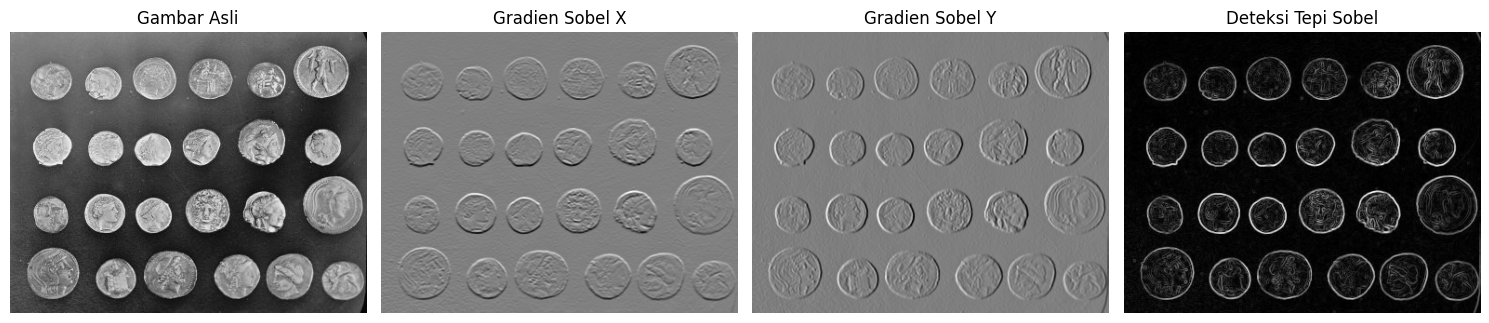

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters

# Ambil gambar bawaan dari skimage
image = data.coins()
gray_image = color.rgbgray(image) if image.ndim == 3 else image #konversi ke grayscal jika perlu

#hitung gradien dengan operator sobel
sobel_x = filters.sobel_h(gray_image) #sobel arah horizontal
sobel_y = filters.sobel_v(gray_image) #sobel arah vertikal
sobel_edge = filters.sobel(gray_image) #kombinasi ke2nya

#visualisasi hasil
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_x, cmap='gray')
ax[1].set_title("Gradien Sobel X")
ax[1].axis("off")

ax[2].imshow(sobel_y, cmap='gray')
ax[2].set_title("Gradien Sobel Y")
ax[2].axis("off")

ax[3].imshow(sobel_edge, cmap='gray')
ax[3].set_title("Deteksi Tepi Sobel")
ax[3].axis("off")

plt.tight_layout()
plt.show()


### Gambar Berwarna

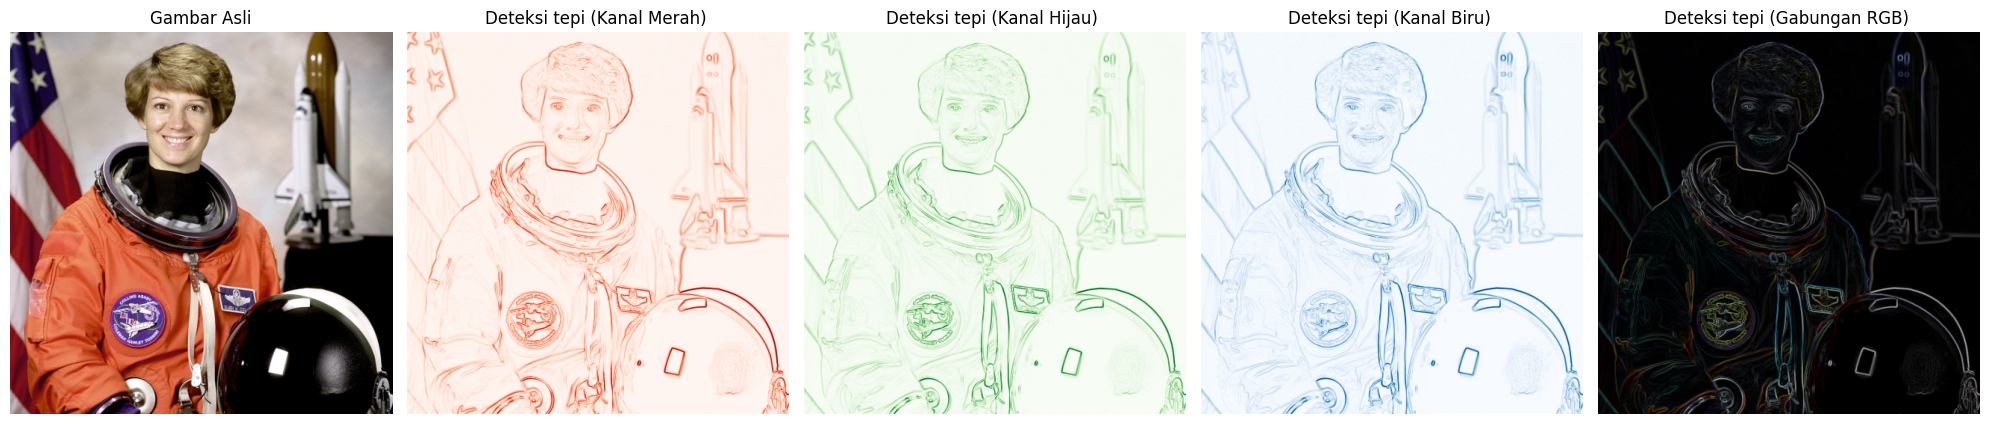

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters

# Ambil gambar bawaan dari skimage
image = data.astronaut()

#pisahkan kanal warna
red_channel = image [:, :, 0] #kanal merah
green_channel = image [:, :, 1] #kanal hijau
blue_channel = image[:, :, 2] #kanal biru

#menerapkan operator sobel
sobel_red = filters.sobel(red_channel)
sobel_green = filters.sobel(green_channel)
sobel_blue = filters.sobel(blue_channel)

#gabungkan hasil dengan ambil rata rata dari ke3 kanal
sobel_color = np.stack((sobel_red, sobel_green, sobel_blue), axis=2)

#visualisasi hasil
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_red, cmap='Reds')
ax[1].set_title("Deteksi tepi (Kanal Merah) ")
ax[1].axis("off")

ax[2].imshow(sobel_green, cmap='Greens')
ax[2].set_title("Deteksi tepi (Kanal Hijau) ")
ax[2].axis("off")

ax[3].imshow(sobel_blue, cmap='Blues')
ax[3].set_title("Deteksi tepi (Kanal Biru) ")
ax[3].axis("off")

ax[4].imshow(sobel_color)
ax[4].set_title("Deteksi tepi (Gabungan RGB) ")
ax[4].axis("off")

plt.tight_layout()
plt.show()

## P2 Deteksi Tepi dengan operator Robets

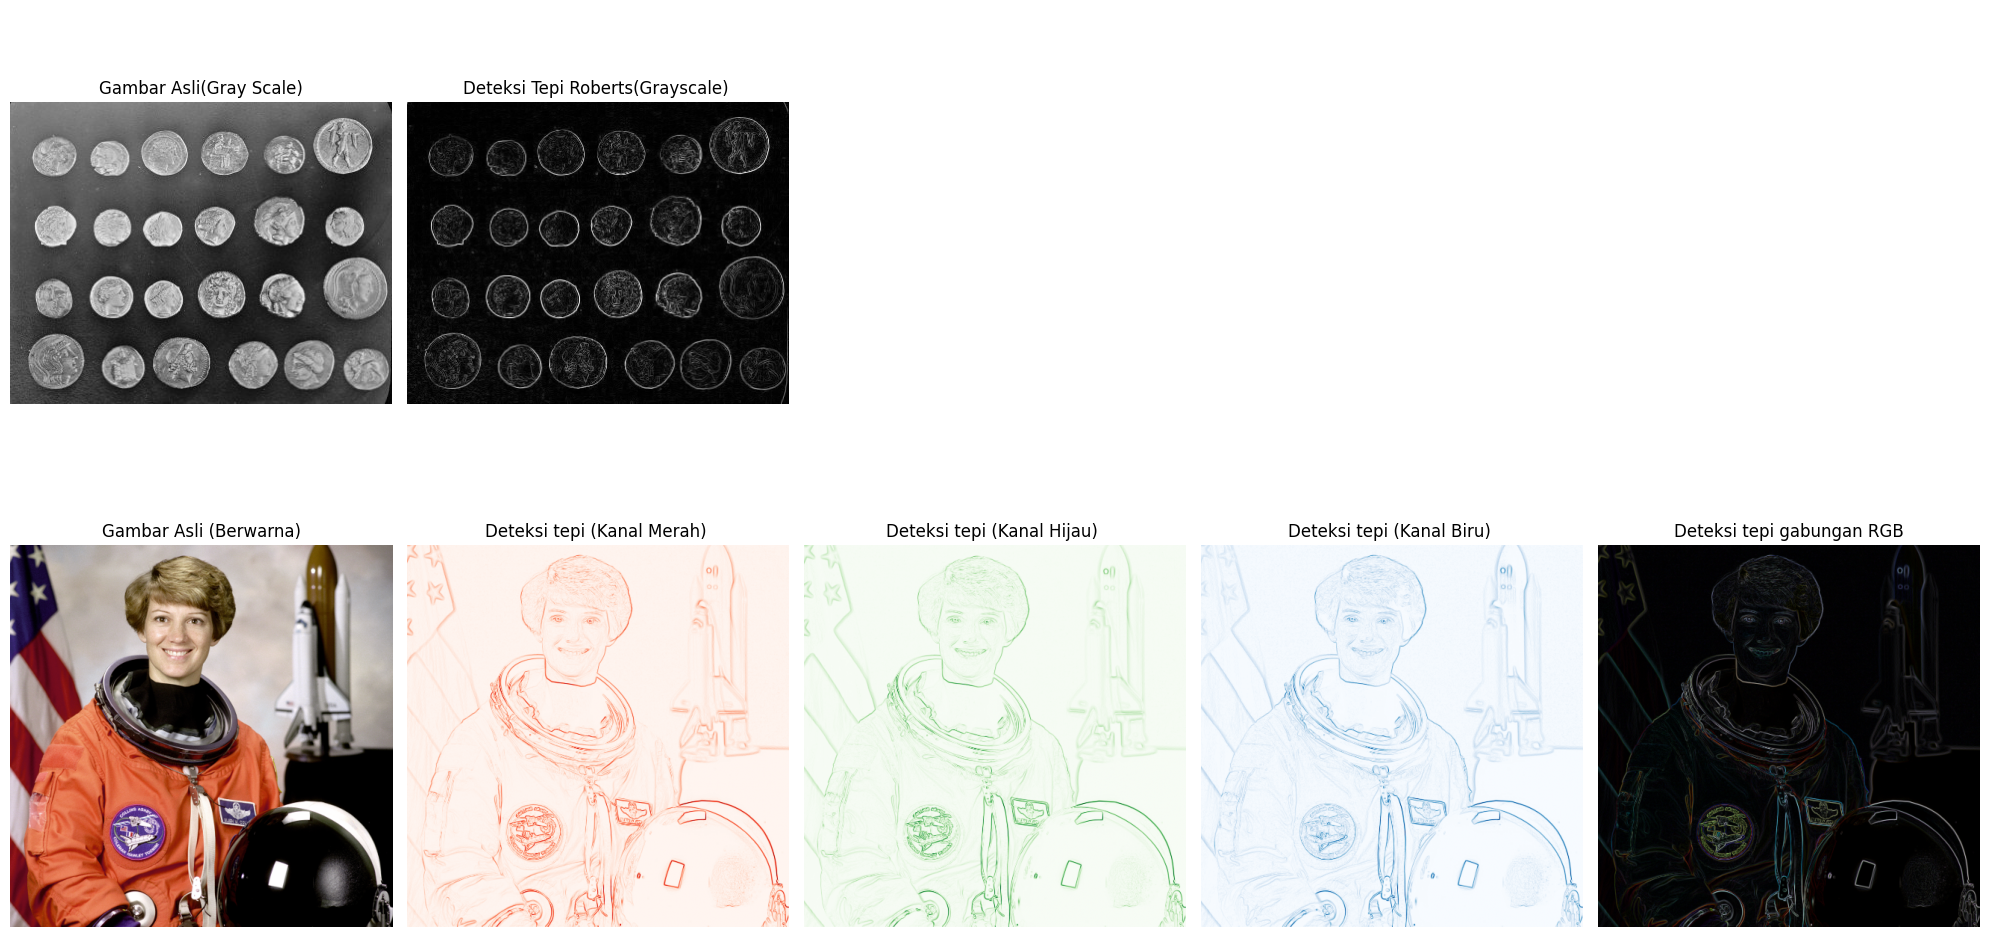

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters

#===============CITRA GRAYSCAL==================
# ambil gambar dr skimage
image_gray = data.coins()

# terapkan operator roberts
roberts_gray = filters.roberts(image_gray)


#============CITRA BERWARNA=====================
# ambil gambar berwarna dari skimage
image_color = data.astronaut()

# pisahkan kanal warna (R, G, B)
red_channel = image [:, :, 0] #kanal merah
green_channel = image [:, :, 1] #kanal hijau
blue_channel = image[:, :, 2] #kanal biru

# menerapkan operator Roberts pada masing kanal warna
roberts_red = filters.roberts(red_channel)
roberts_green = filters.roberts(green_channel)
roberts_blue = filters.roberts(blue_channel)

# gabungkan hasil deteksi tepi dari ke3 kanal
roberts_color = np.stack((roberts_red, roberts_green, roberts_blue), axis=2)

# visualisasi hasil
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
ax = axes.ravel()

#================CITRA GRAYSCALE================
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Gambar Asli(Gray Scale)")
ax[0].axis("off")

ax[1].imshow(roberts_gray, cmap='gray')
ax[1].set_title("Deteksi Tepi Roberts(Grayscale) ")
ax[1].axis("off")

# kosongkan posisi 3, 4, 5 agar rapi
for i in range(2, 5):
  ax[i].axis("off")


#================CITRA BERWARNA==================
ax[5].imshow(image_color)
ax[5].set_title("Gambar Asli (Berwarna)")
ax[5].axis("off")

ax[6].imshow(roberts_red, cmap='Reds')
ax[6].set_title("Deteksi tepi (Kanal Merah) ")
ax[6].axis("off")

ax[7].imshow(roberts_green, cmap='Greens')
ax[7].set_title("Deteksi tepi (Kanal Hijau) ")
ax[7].axis("off")

ax[8].imshow(roberts_blue, cmap='Blues')
ax[8].set_title("Deteksi tepi (Kanal Biru) ")
ax[8].axis("off")

ax[9].imshow(roberts_color)
ax[9].set_title("Deteksi tepi gabungan RGB")
ax[9].axis("off")

plt.tight_layout()
plt.show()

## P3 Perbandingan deteksi dengan beberapa faktor
## (Sobel, Roberts, Prewitt, Kirsch, dan Canny) pada citra grayscale dan Berwarna

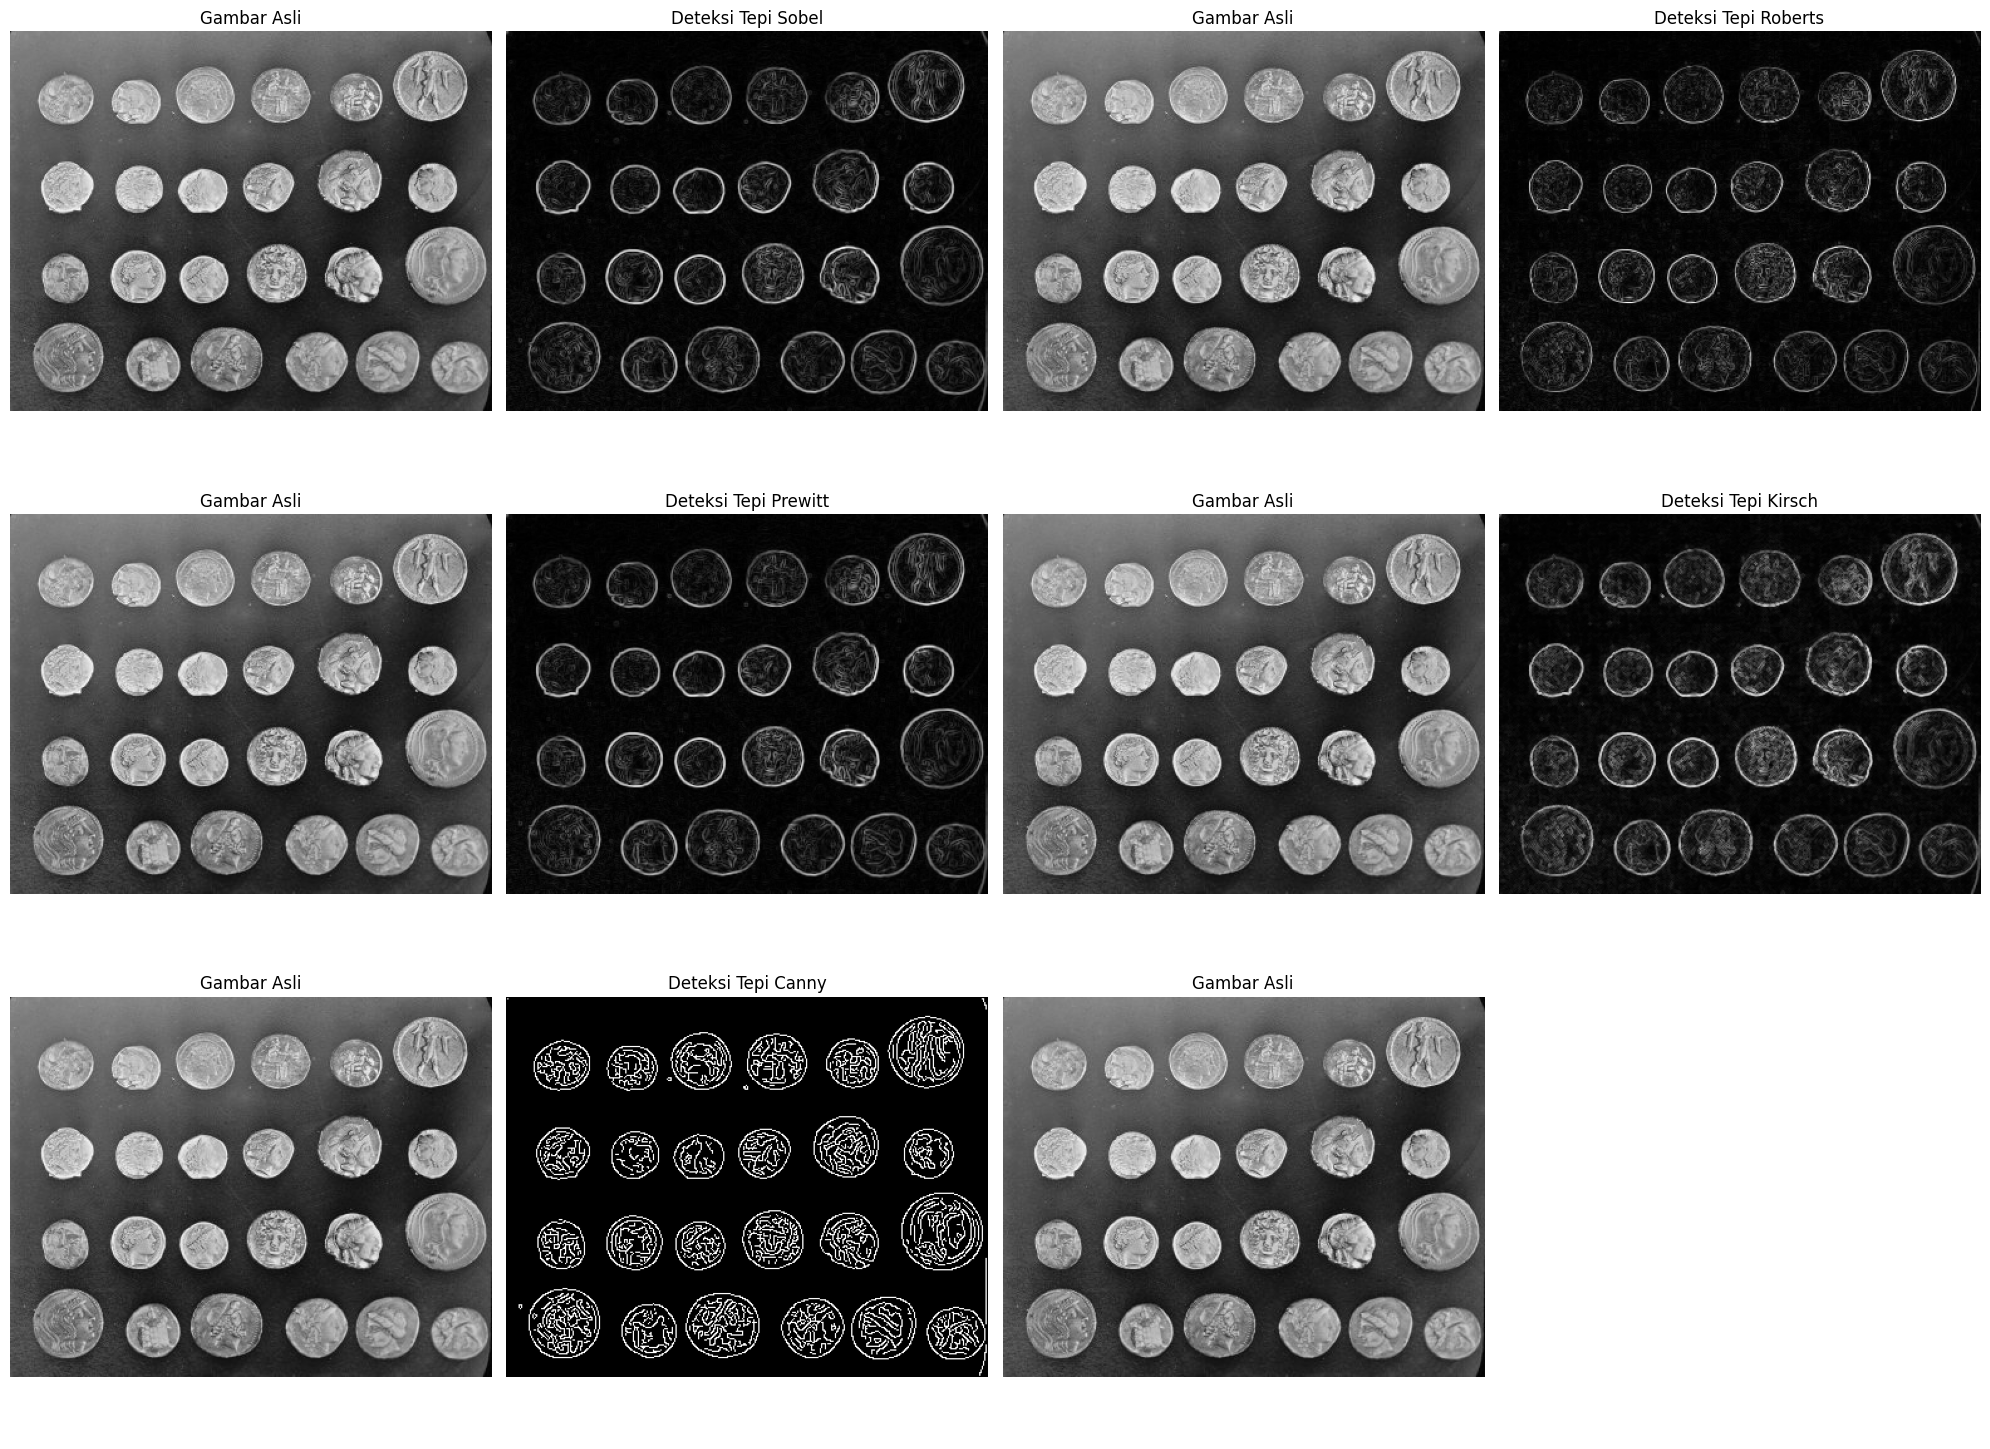

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, feature
from skimage.filters.rank import gradient
from skimage.morphology import disk

#===============GAMBAR GRAYSCALE=================
image_gray = data.coins()

#operator sobel
sobel_edge =filters.sobel(image_gray)

#operator roberts
roberts_edge = filters.roberts(image_gray)

#operator prewitt
prewitt_edge = filters.prewitt(image_gray)

#operator Kirsch
kirsch_edge = gradient(image_gray, disk(1))

#operator canny
canny_edge = feature.canny(image_gray, sigma=1)

# visualisasi hasil
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
ax = axes.ravel()

# Baris 1: Gambar Asli - Sobel
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_edge, cmap='gray')
ax[1].set_title("Deteksi Tepi Sobel")
ax[1].axis("off")

ax[2].imshow(image_gray, cmap='gray')
ax[2].set_title("Gambar Asli")
ax[2].axis("off")

ax[3].imshow(roberts_edge, cmap='gray')
ax[3].set_title("Deteksi Tepi Roberts")
ax[3].axis("off")

# Baris 2 : Gambar Asli - Prewitt
ax[4].imshow(image_gray, cmap='gray')
ax[4].set_title("Gambar Asli")
ax[4].axis("off")

ax[5].imshow(prewitt_edge, cmap='gray')
ax[5].set_title("Deteksi Tepi Prewitt")
ax[5].axis("off")

ax[6].imshow(image_gray, cmap='gray')
ax[6].set_title("Gambar Asli")
ax[6].axis("off")

ax[7].imshow(kirsch_edge, cmap='gray')
ax[7].set_title("Deteksi Tepi Kirsch")
ax[7].axis("off")

#Baris 3 : Gambar Asli - Canny
ax[8].imshow(image_gray, cmap='gray')
ax[8].set_title("Gambar Asli")
ax[8].axis("off")

ax[9].imshow(canny_edge, cmap='gray')
ax[9].set_title("Deteksi Tepi Canny")
ax[9].axis("off")

ax[10].imshow(image_gray, cmap='gray')
ax[10].set_title("Gambar Asli")
ax[10].axis("off")

#kosongkan posisi terakhir agar tampilan rapi
ax[11].axis("off")

plt.tight_layout()
plt.show()